In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
D1=np.array([[1.0,1.2,3,4,5,6],
            [1.5,3,2.3,5.3,3.8,5.5]])
D2=np.array([[-0.6,1.0,1.2,3,4,5,6],
            [2.9,1.5,3,2.3,5.3,3.8,5.5]])

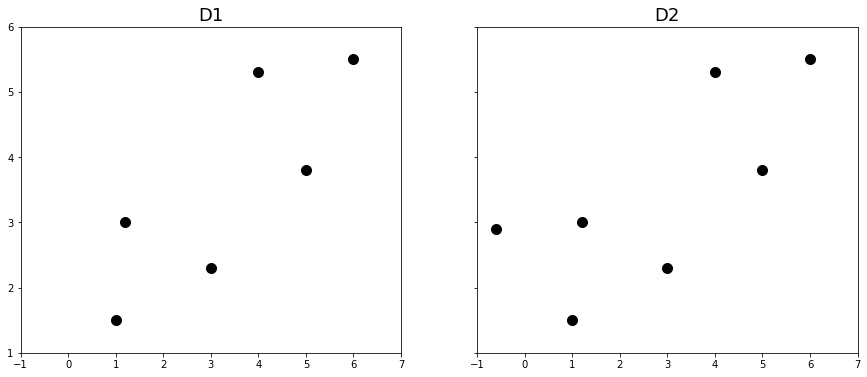

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=True,sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0],D1[1],'ko',markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1',fontsize=18)

ax2.plot(D2[0],D2[1],'ko',markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2',fontsize=18)

plt.show()

In [ ]:
def machine_learning(D):
    N=D.shape[1]
    X=np.c_[np.ones(N),D[0]]
    y=D[1]
    
    w=np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    return w

def more_clever(D):
    first, last=D[:,0],D[:,-1]
    w1=(last[1]-first[1])/(last[0]-first[0])
    w0=-w1*first[0]+first[1]
    return (w0,w1)

def f(x,w):
    return w[1]*x+w[0]

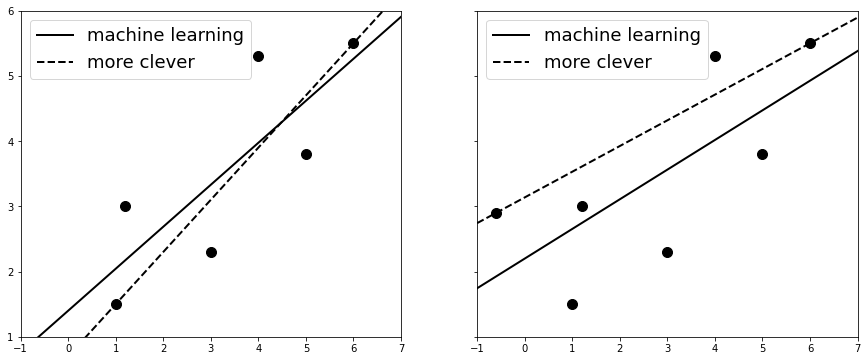

In [ ]:
w_ml_d1=machine_learning(D1)
w_mc_d1=more_clever(D1)

w_ml_d2=machine_learning(D2)
w_mc_d2=more_clever(D2)

x=np.linspace(-1,7,100)

fig, (ax1,ax2)=plt.subplots(1,2,sharex=True,sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0],D1[1],'ko',markersize=10)
ax1.plot(x,f(x,w_ml_d1),c='k',lw=2,label='machine learning')
ax1.plot(x,f(x,w_mc_d1),'--',c='k',lw=2,label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0],D2[1],'ko',markersize=10)
ax2.plot(x,f(x,w_ml_d2),c='k',lw=2,label='machine learning')
ax2.plot(x,f(x,w_mc_d2),'--',c='k',lw=2,label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)

plt.show()

In [ ]:
D1=np.array([[1.0,1.2,3,4,5,6],
           [1.5,3,2.3,5.3,3.8,5.5]])

num_iters=150
eta=0.02

np.random.seed(2)
w=np.random.randn(2)
N=D1.shape[1]

ws,L=[],[]

X=np.c_[np.ones(N),D1[0]]
y=D1[1]

for i in range(num_iters):
    c=(1/N)*np.dot(X.T,np.dot(X,w)-y)
    w-=eta*c
    ws.append(w)
    L.append(((np.dot(X,w)-y)**2).sum()/(2*N))

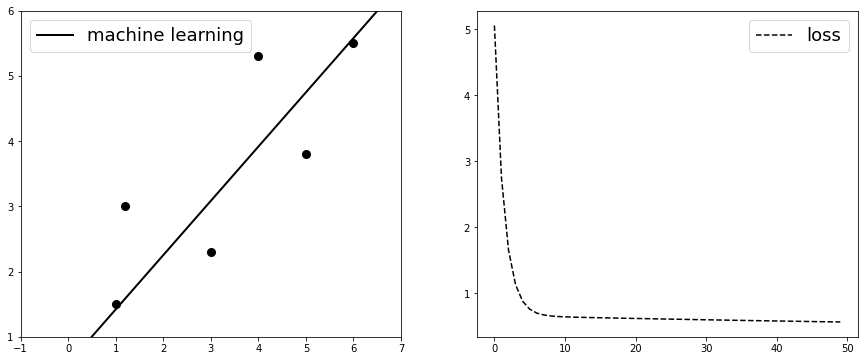

In [ ]:
x=np.linspace(-1,7,100)

fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches((15,6))

ax1.plot(D1[0],D1[1],'ko',markersize=8)
ax1.plot(x,f(x,w),c='k',lw=2,label='machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(L[:50],'--',c='k',label='loss')
ax2.legend(fontsize=18)
plt.show()